**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 4b | Principal Component Analysis

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'figure.figsize': [6,6]})

np.set_printoptions(suppress=True, precision=5)

## Task 1: Load and preprocess data

We are using the [Wisconsin Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)) this week. We will use principal component analysis (PCA) to gain insight about the structure of the dataset.

1. Import dataset using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to create a Dataframe from the url:  https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv
2. Create a `cancer_x` DataFrame which includes all of the columns that have the word "mean" in the title (*there should be 10 in total*).
3. Print out a summary of the `cancer_x` DataFrame.
4. Update `cancer_x` so that each variable is min-max normalized. Print out a summary of the updated DataFrame.
5. `diagnosis` is a categorical variable (`M` stands for "malignant" and `B` stands for "benign"). Create a `cancer_y` Series with from the column `diagnosis` and convert the data type to [categorical](https://pandas.pydata.org/docs/user_guide/categorical.html).
    1. In Task 2 of this lab you will use `diagnosis` to color-code a scatter plot of the cancer data. Use [pd.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to replace the categorical levels with color string names. To do this, pass in a dictionary as the `replace` method parameter that maps the strings `'M'` and `'B'` to [colors](https://matplotlib.org/stable/gallery/color/named_colors.html) of your choice (e.g. `'red'`, `'blue'`). By default, the `replace` method doesn't update the DataFrame when you call it, so don't forget to update the value of `cancer_y` by assigning it to the output of your `replace` method call.
    2. Print out `cancer_y`. You should see the `dtype` as `category` and the values should be one of two named color strings (e.g. `'red'`, `'blue'`).

In [19]:
# 1. Import dataset
url = 'https://raw.githubusercontent.com/patrickmlong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv'
cancer = pd.read_csv(url)

# 2. Create cancer_x DataFrame
cancer_x = cancer.filter(like='mean')

# 3. Print out a summary of the cancer_x DataFrame
print(cancer_x.describe())

# 4. Min-max normalize cancer_x
cancer_x = (cancer_x - cancer_x.min()) / (cancer_x.max() - cancer_x.min())

# 5. Create cancer_y Series
cancer_y = cancer['diagnosis'].astype('category')

# 5a. Replace categorical levels with color strings
# cancer_y = cancer_y.replace({'M':'red', 'B':'blue'})
cancer_y = cancer_y.cat.rename_categories({'M':'red', 'B':'blue'})

# 5b. Print out cancer_y
print(f"\nNew cancer_y: \n{cancer_y}")

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

## Task 2: PCA

### 2a. Create and visualize a covariance matrix

1. Use the [Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) documentation to find out how to compute the covariance matrix of the `cancer_x` columns, store it, and print its shape.
2. Use the [matplotlib](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) documentation to visualize the covariance matrix with a heatmap.
    1. Include a title
    2. Include labels for each row and column 
        1. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`
        2. If necessary, rotating the text for the x-axis using `setp`
    3. Use an perceptually uniform sequential [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). 
        1. Set it using the `cmap` parameter for `imshow`
    4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

*Your heatmap should show a 10x10 grid of colored squares.*

Covariance matrix shape: (10, 10)


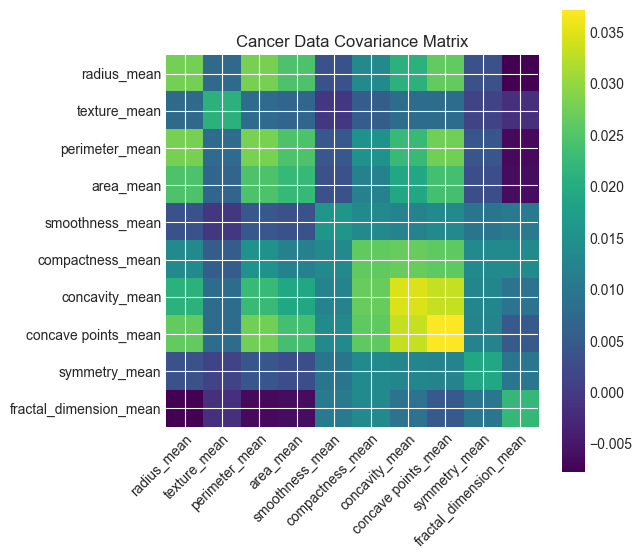

In [20]:
# 1. Compute the covariance matrix
cov_matrix = cancer_x.cov()
print(f"Covariance matrix shape: {cov_matrix.shape}")

# 2. Visualize the covariance matrix
fig, ax = plt.subplots()


# 2a. Include a title
ax.set_title('Cancer Data Covariance Matrix')

# 2b. Include labels for each row and column
ax.set_xticks(np.arange(len(cov_matrix.columns)))
ax.set_yticks(np.arange(len(cov_matrix.columns)))
ax.set_xticklabels(cov_matrix.columns)
ax.set_yticklabels(cov_matrix.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# 3. Use a perceptually uniform sequential colormap
im = ax.imshow(cov_matrix, cmap='viridis')

# 4. Include a colorbar
plt.colorbar(im)

### 2b. Questions

**Question 1:** What interpretations can you draw from this covariance matrix?

**Answer 1:** The covariance matrix shown represents the relationships between different vars in the cancer data.

1. **Positive Covariance **:
   - The yellow squares denote the highest positive covariance, wheras the green denote, still high but less so, positive covariance between vars. For example, among not directly correlated variables, ie not the same var, "concavity_mean" and "concave points_mean" have the highest positive covariance.

2. **Negative Covariance**:
       - The lavender squares are the only negative values, and they are only very slightly negative. This suggests that none of the variables are strongly inversely proportional. On the other hand, there are a bunch of covariances that are in #e1bdea {<font color="#e1bdea">■</font>} to #9c99bb {<font color="#9c99bb">■</font>} range that suggest a low (near-zero) or slightly negative covariance. For instance, "area_mean" and "fractal_dimension_mean" have a slightly negative covariance, indicating that although hardly related an increase in one might correspond to a slight decrease in the other.

3. **Near-Zero Covariance**:
   - The darker-lavender squares indicate a near-zero covariance. there are a bunch of covariances that are in #aca0c5 {<font color="#aca0c5">■</font>} to #9698b7 {<font color="#9698b7">■</font>} range that suggest a near-zero covariance. For instance, "symmetry_mean" and "texture_mean" have a near-zero covariance, indicating that they have nearly zero correspondance, suggesting that changes in texture do not significantly impact the symmetry of the tumor.

### 2c. Performing PCA

Use Sci-kit Learn's [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to apply PCA to the cancer dataset.
1. Create an instance of the PCA class with 2 components. *This means that we will reduce the dimensionality of the cancer dataset from 10-D to 2-D*.
2. Call the method `fit_transform` with `cancer_x` as the X parameter and saving the results into a new variable representing the transformed values.
3. Print the shape of the transformed values. The transformed values should have the shape `(569, 2)`.
4. Print the first 5 rows of the transformed data.

In [21]:
from sklearn.decomposition import PCA

In [22]:
# 1. Create an instance of the PCA class with 2 components
pca = PCA(n_components=2)

# 2. Call the method fit_transform
transformed_data = pca.fit_transform(cancer_x)

# 3. Print the shape of the transformed values
print(f"PCA-transformed data shape: {transformed_data.shape}")

# 4. Print the first 5 rows of the transformed data
print(f"Transformed data:\n{transformed_data[:5]}")

print('''
-------------------------------------
Your results should look like this:
-------------------------------------
PCA-transformed data shape: (569, 2)
Transformed data:
[[ 0.89009  0.51092]
 [ 0.30381 -0.39424]
 [ 0.67735 -0.07657]
 [ 0.53311  1.05071]
 [ 0.56301 -0.19896]]
-------------------------------------
''')

PCA-transformed data shape: (569, 2)
Transformed data:
[[ 0.89009  0.51092]
 [ 0.30381 -0.39424]
 [ 0.67735 -0.07657]
 [ 0.53311  1.05071]
 [ 0.56301 -0.19896]]

-------------------------------------
Your results should look like this:
-------------------------------------
PCA-transformed data shape: (569, 2)
Transformed data:
[[ 0.89009  0.51092]
 [ 0.30381 -0.39424]
 [ 0.67735 -0.07657]
 [ 0.53311  1.05071]
 [ 0.56301 -0.19896]]
-------------------------------------



### 2d. Graph a scatter plot of the transformed data

Graph a scatter plot of the transformed data using [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html)
1. Scatter Parameters
    1. Graph the first principle component on the x axis (first column of the tranformed data)
    2. Graph the second principle component on the y axis (second column of the tranformed data)
    3. Use the `cancer_y` series for the color with a black edgecolor
3. Include a title, and axis labels.
4. Add a custom [legend](https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists) using mpatches.
    1. Create 1 patch with the `color` keyword argument set to whatever named color string you set for malignant
    1. Create 1 patch with the `color` keyword argument set to whatever named color string you set for benign

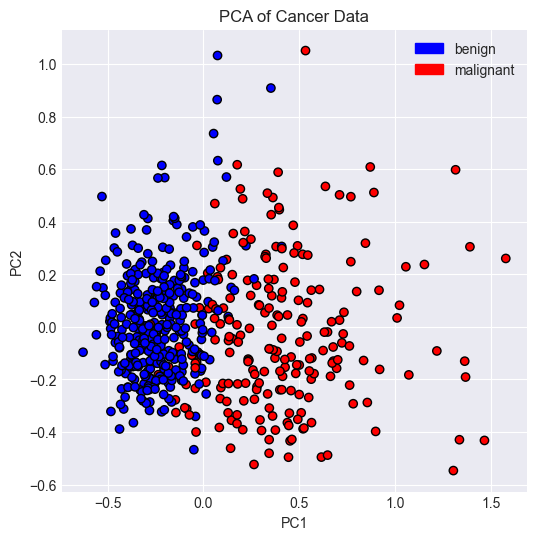

In [23]:
import matplotlib.patches as mpatches

# 1. Scatter plot of transformed data
fig2, ax = plt.subplots()
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cancer_y, edgecolor='black')

# 2. Include a title, and axis labels
ax.set_title('PCA of Cancer Data')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# 3. Add a custom legend

b_patch = mpatches.Patch(color='blue', label='benign')
m_patch = mpatches.Patch(color='red', label='malignant')
ax.legend(handles=[b_patch, m_patch])
plt.show()

### 2d. Visualize the PCA loadings

In PCA, the **loadings** refer to the numbers that make up the principal component vectors (i.e. the eigenvectors). The shape of the loadings (eigenvectors) are `(k, M)` where `k` is the number of PCs and `M` is the number of original variables in the dataset. This task focuses on visualizing and interpreting what the loadings mean.

1. Print out the shape of the loadings. The [PCA class](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) of Scikit-learn stores these as a field called `components_`.
2. Use [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to make a heatmap of the loadings. You should plot the **transposed** loadings, which will make your plot more readable — i.e. your heatmap should be taller than it is wide.
   1. Include a title.
   2. Set the `xticks`, `yticks`, `xticklabels` and `ytickslabels`. The y tick labels (rows) should show the original 10 variable names. The 2 x tick labels should be labeled with `'PC1'` and `'PC2'`.
   3. Use an perceptually uniform **diverging** [colormap](https://matplotlib.org/tutorials/colors/colormaps.html). Set it using the `cmap` parameter for `imshow`.
   4. Include a `colorbar`. This can be achieved by assigning a variable to your `imshow` call and then passing in that variable as a parameter to `plt.colorbar`. If that does not work, the [this example code](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style) may be helpful.

PCA loadings shape: (2, 10)


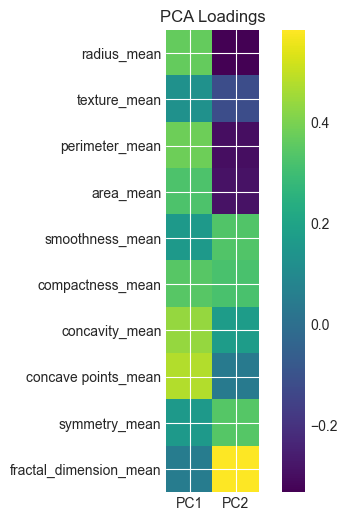

In [24]:
# 1. Print out the shape of the loadings
print(f"PCA loadings shape: {pca.components_.shape}")

# 2. Visualize the PCA loadings
fig3, ax = plt.subplots()
im2 = ax.imshow(pca.components_.T, cmap='viridis')

# 2a. Include a title
ax.set_title('PCA Loadings')

# 2b. Set the xticks, yticks, xticklabels and ytickslabels
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(len(cancer_x.columns)))
ax.set_xticklabels(['PC1', 'PC2'])
ax.set_yticklabels(cancer_x.columns)

# 2c. Include a colorbar
plt.colorbar(im2)
plt.show()


### 2e. Questions

**Question 2:** Interpret the loadings of PC1 and PC2. Which variables in the cancer dataset are most positively and negatively correlated with each PC?

**Answer 2:** The PCA loadings plot helps us understand which variables in the cancer dataset are most strongly correlated with the first two principal components.

### Principal Component 1 (PC1)
- **Positively Correlated Variables**:
  - **concave points_mean**: This variable has the highest positive loading on PC1, indicating that it is most strongly correlated with PC1.
  - **concavity_mean**: This is the next most positively correlated with PC1. 
  - **radius_mean**, **perimeter_mean**, **area_mean**, and **compactness_mean**: These variables are the next most highly positively correlated with PC1.
  - **Else**: Everything else has almost zero correlation with PC1. 
  

- **Negatively Correlated Variables**:
  - **fractal_dimension_mean**: Is perhaps very slighlty negatively correlated with PC1.

### Principal Component 2 (PC2)
- **Positively Correlated Variables**:
  - **fractal_dimension_mean**: This variable has a very strong positive loading on PC2, indicating that it is the most highly positively correlated with PC2.
  - **symmetry_mean**, **compactness_mean**, and **smoothness_mean**: These variables also show relatively strong positive loadings, and thus are relatively strongly positively correlated.
  - **concave points_mean** and **concavity_mean**: These variables are also positively correlated with PC2, but very slightly, in the near-zero range.

- **Negatively Correlated Variables**:
  - **area_mean**, **radius_mean**, and **perimeter_mean**: These variables have the highest negative loadings on PC2, indicating negative correlation with PC2, although still relatively moderate considering the scale.
  - **texture_mean**: Still a negative loading and not near-zero, thus negatively correlated with PC2. However, less so than the above.

### Summary:
- **PC1** is primarily associated with concavity measures and some dimensional features like radius, perimeter, and area. 
- **PC2** is primarily associated with fractal_dimension and again dimensional featutres; however, in this case dimensional features display negative correlation. 


## Turn in your lab

Follow the usual submission format and submit your lab on Google Classroom.